In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import six

In [2]:
df_flange = pd.read_csv('data/gasket.csv')

In [3]:
df_flange_train = df_flange.query("T == 'training'").drop(columns=['T','No','30','40','50','60','70','80','90'])
df_flange_test = df_flange.query("T == 'test'").drop(columns=['T','No','30','40','50','60','70','80','90'])
df_flange_train_corr = df_flange_train.drop(columns=['GP','WP'])
df_flange_test_corr = df_flange_test.drop(columns=['GP','WP'])

In [4]:
df_flange_30 = df_flange.loc[0:29,'30']
df_flange_40 = df_flange.loc[0:29,'40']
df_flange_50 = df_flange.loc[0:29,'50']
df_flange_60 = df_flange.loc[0:29,'60']
df_flange_70 = df_flange.loc[0:29,'70']
df_flange_80 = df_flange.loc[0:29,'80']
df_flange_90 = df_flange.loc[0:29,'90']

In [5]:
df_flange_train.corr()

,L,B,D,T.1,DWT,SC,OP,GP,WP,CREW,WD,TLWT,Total_gasket
L,1.000000,0.800507,0.708220,0.787409,0.831970,0.759617,0.498982,0.251088,0.219355,0.437695,0.689074,0.522639,0.402149
B,0.800507,1.000000,0.921968,0.935546,0.960828,0.918393,0.707053,0.378457,0.460599,0.576606,0.860151,0.831618,0.619755
D,0.708220,0.921968,1.000000,0.959301,0.883952,0.899125,0.737340,0.446433,0.454727,0.519198,0.786949,0.863230,0.710241
T.1,0.787409,0.935546,0.959301,1.000000,0.935242,0.914190,0.740323,0.389185,0.502902,0.554862,0.816102,0.821027,0.657212
DWT,0.831970,0.960828,0.883952,0.935242,1.000000,0.931129,0.714035,0.252682,0.481123,0.489570,0.888393,0.767432,0.558410
SC,0.759617,0.918393,0.899125,0.914190,0.931129,1.000000,0.736439,0.326827,0.460806,0.428039,0.855559,0.821997,0.630235
OP,0.498982,0.707053,0.737340,0.740323,0.714035,0.736439,1.000000,0.588084,0.533555,0.512096,0.829256,0.837969,0.593377
GP,0.251088,0.378457,0.446433,0.389185,0.252682,0.326827,0.588084,1.000000,0.176115,0.408020,0.402254,0.561381,0.312737
WP,0.219355,0.460599,0.454727,0.502902,0.481123,0.460806,0.533555,0.176115,1.000000,0.407635,0.563393,0.526544,0.193767
CREW,0.437695,0.576606,0.519198,0.554862,0.489570,0.428039,0.512096,0.408020,0.407635,1.000000,0.482154,0.677164,0.457349


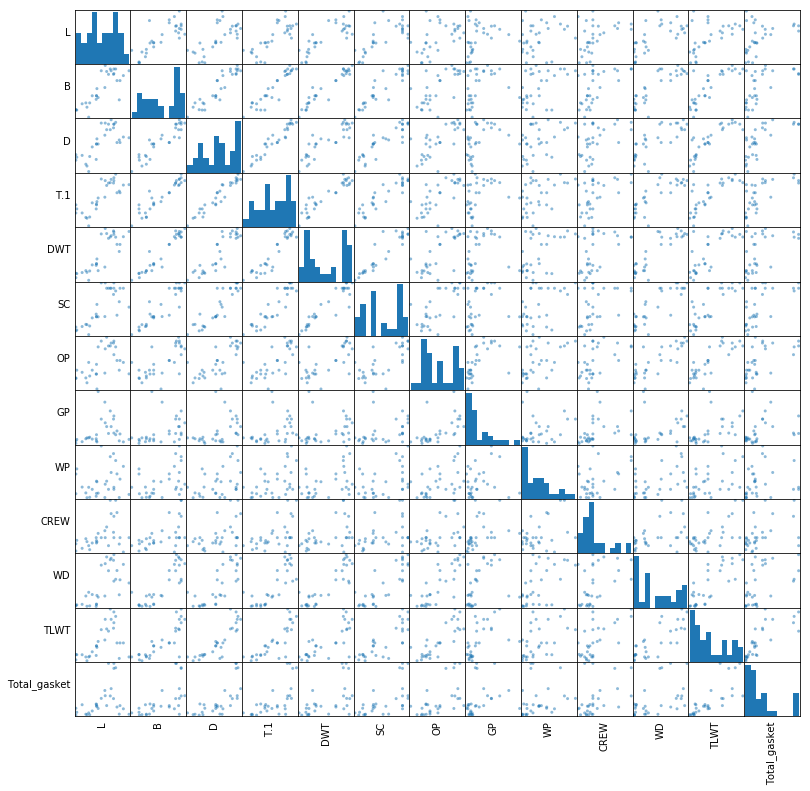

In [6]:
axs = pd.plotting.scatter_matrix(df_flange_train, figsize=(13,13))
n=len(df_flange_train.columns)
for i in range(n):
    v = axs[i,0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1,i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# Linear Regression

In [7]:
linear_regressor_30 = LinearRegression()
linear_regressor_40 = LinearRegression()
linear_regressor_50 = LinearRegression()
linear_regressor_60 = LinearRegression()
linear_regressor_70 = LinearRegression()
linear_regressor_80 = LinearRegression()
linear_regressor_90 = LinearRegression()

In [8]:
linear_model_flange30 = linear_regressor_30.fit(df_flange_train,df_flange_30)
linear_model_flange40 = linear_regressor_40.fit(df_flange_train,df_flange_40)
linear_model_flange50 = linear_regressor_50.fit(df_flange_train,df_flange_50)
linear_model_flange60 = linear_regressor_60.fit(df_flange_train,df_flange_60)
linear_model_flange70 = linear_regressor_70.fit(df_flange_train,df_flange_70)
linear_model_flange80 = linear_regressor_80.fit(df_flange_train,df_flange_80)
linear_model_flange90 = linear_regressor_90.fit(df_flange_train,df_flange_90)

In [9]:
flange30_prediction_linear = linear_model_flange30.predict(df_flange_test)
flange40_prediction_linear = linear_model_flange40.predict(df_flange_test)
flange50_prediction_linear = linear_model_flange50.predict(df_flange_test)
flange60_prediction_linear = linear_model_flange60.predict(df_flange_test)
flange70_prediction_linear = linear_model_flange70.predict(df_flange_test)
flange80_prediction_linear = linear_model_flange80.predict(df_flange_test)
flange90_prediction_linear = linear_model_flange90.predict(df_flange_test)

In [10]:
print(flange30_prediction_linear)
print(flange40_prediction_linear)
print(flange50_prediction_linear)
print(flange60_prediction_linear)
print(flange70_prediction_linear)
print(flange80_prediction_linear)
print(flange90_prediction_linear)

[ 4.22961529  4.04412617 10.19697129]
[-2.0156208  25.3320103  38.21356816]
[ 5.14601896 27.26144035 62.76679549]
[ 51.22632378  46.97292291 103.41245532]
[ 67.819319   103.85965141 220.76989011]
[162.69918758 179.54219652 459.74927532]
[ 95.89515619 128.98765234 218.89104432]


# 2nd Degree Poly Regression
* n차 다항식 및 변수 끼리의 곱으로만

In [11]:
poly_2nd_30 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_40 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_50 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_60 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_70 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_80 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_90 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])

In [12]:
poly_2nd_model_flange30 = poly_2nd_30.fit(df_flange_train,df_flange_30)
poly_2nd_model_flange40 = poly_2nd_40.fit(df_flange_train,df_flange_40)
poly_2nd_model_flange50 = poly_2nd_50.fit(df_flange_train,df_flange_50)
poly_2nd_model_flange60 = poly_2nd_60.fit(df_flange_train,df_flange_60)
poly_2nd_model_flange70 = poly_2nd_70.fit(df_flange_train,df_flange_70)
poly_2nd_model_flange80 = poly_2nd_80.fit(df_flange_train,df_flange_80)
poly_2nd_model_flange90 = poly_2nd_90.fit(df_flange_train,df_flange_90)

In [13]:
flange30_prediction_poly_2nd = poly_2nd_model_flange30.predict(df_flange_test)
flange40_prediction_poly_2nd = poly_2nd_model_flange40.predict(df_flange_test)
flange50_prediction_poly_2nd = poly_2nd_model_flange50.predict(df_flange_test)
flange60_prediction_poly_2nd = poly_2nd_model_flange60.predict(df_flange_test)
flange70_prediction_poly_2nd = poly_2nd_model_flange70.predict(df_flange_test)
flange80_prediction_poly_2nd = poly_2nd_model_flange80.predict(df_flange_test)
flange90_prediction_poly_2nd = poly_2nd_model_flange90.predict(df_flange_test)

In [14]:
print(flange30_prediction_poly_2nd)
print(flange40_prediction_poly_2nd)
print(flange50_prediction_poly_2nd)
print(flange60_prediction_poly_2nd)
print(flange70_prediction_poly_2nd)
print(flange80_prediction_poly_2nd)
print(flange90_prediction_poly_2nd) 

[9.14964016 2.59759929 9.19003805]
[23.43801422 32.20575334 45.09098222]
[-23.55193095  35.26595772  49.78630612]
[59.77377251 26.04510735 68.82488838]
[ 73.36047601  91.37695051 180.14033879]
[290.1052403  162.03993278 305.8434222 ]
[100.5675206   91.01996712 202.4168692 ]


# 3rd Degree Poly Regression
* n차 다항식 및 변수 끼리의 곱으로만

In [15]:
poly_3rd_30 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_40 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_50 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_60 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_70 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_80 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_90 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

In [16]:
poly_3rd_model_flange30 = poly_3rd_30.fit(df_flange_train,df_flange_30)
poly_3rd_model_flange40 = poly_3rd_40.fit(df_flange_train,df_flange_40)
poly_3rd_model_flange50 = poly_3rd_50.fit(df_flange_train,df_flange_50)
poly_3rd_model_flange60 = poly_3rd_60.fit(df_flange_train,df_flange_60)
poly_3rd_model_flange70 = poly_3rd_70.fit(df_flange_train,df_flange_70)
poly_3rd_model_flange80 = poly_3rd_80.fit(df_flange_train,df_flange_80)
poly_3rd_model_flange90 = poly_3rd_90.fit(df_flange_train,df_flange_90)

In [17]:
flange30_prediction_poly_3rd = poly_3rd_model_flange30.predict(df_flange_test)
flange40_prediction_poly_3rd = poly_3rd_model_flange40.predict(df_flange_test)
flange50_prediction_poly_3rd = poly_3rd_model_flange50.predict(df_flange_test)
flange60_prediction_poly_3rd = poly_3rd_model_flange60.predict(df_flange_test)
flange70_prediction_poly_3rd = poly_3rd_model_flange70.predict(df_flange_test)
flange80_prediction_poly_3rd = poly_3rd_model_flange80.predict(df_flange_test)
flange90_prediction_poly_3rd = poly_3rd_model_flange90.predict(df_flange_test)

In [18]:
print(flange30_prediction_poly_3rd)
print(flange40_prediction_poly_3rd)
print(flange50_prediction_poly_3rd)
print(flange60_prediction_poly_3rd)
print(flange70_prediction_poly_3rd)
print(flange80_prediction_poly_3rd)
print(flange90_prediction_poly_3rd)

[38.43137789 -7.44961057 -8.41277949]
[ 98.12985192  -4.68745448 -61.18813741]
[ 25.73550592  14.65576308 -48.61841599]
[ 294.94922238  -64.49351142 -229.90409846]
[ 511.91703514  -89.32666874 -312.11629982]
[1196.86808361 -151.54354716 -385.86229237]
[ 573.44401734 -123.291113   -244.81751907]


# 상관분석한 결과 반영한 부분

# Linear

In [19]:
linear_regressor_30_corr = LinearRegression()
linear_regressor_40_corr = LinearRegression()
linear_regressor_50_corr = LinearRegression()
linear_regressor_60_corr = LinearRegression()
linear_regressor_70_corr = LinearRegression()
linear_regressor_80_corr = LinearRegression()
linear_regressor_90_corr = LinearRegression()

In [20]:
linear_model_flange30_corr = linear_regressor_30_corr.fit(df_flange_train_corr,df_flange_30)
linear_model_flange40_corr = linear_regressor_40_corr.fit(df_flange_train_corr,df_flange_40)
linear_model_flange50_corr = linear_regressor_50_corr.fit(df_flange_train_corr,df_flange_50)
linear_model_flange60_corr = linear_regressor_60_corr.fit(df_flange_train_corr,df_flange_60)
linear_model_flange70_corr = linear_regressor_70_corr.fit(df_flange_train_corr,df_flange_70)
linear_model_flange80_corr = linear_regressor_80_corr.fit(df_flange_train_corr,df_flange_80)
linear_model_flange90_corr = linear_regressor_90_corr.fit(df_flange_train_corr,df_flange_90)

In [21]:
flange30_prediction_linear_corr = linear_model_flange30_corr.predict(df_flange_test_corr)
flange40_prediction_linear_corr = linear_model_flange40_corr.predict(df_flange_test_corr)
flange50_prediction_linear_corr = linear_model_flange50_corr.predict(df_flange_test_corr)
flange60_prediction_linear_corr = linear_model_flange60_corr.predict(df_flange_test_corr)
flange70_prediction_linear_corr = linear_model_flange70_corr.predict(df_flange_test_corr)
flange80_prediction_linear_corr = linear_model_flange80_corr.predict(df_flange_test_corr)
flange90_prediction_linear_corr = linear_model_flange90_corr.predict(df_flange_test_corr)

In [22]:
print(flange30_prediction_linear_corr)
print(flange40_prediction_linear_corr)
print(flange50_prediction_linear_corr)
print(flange60_prediction_linear_corr)
print(flange70_prediction_linear_corr)
print(flange80_prediction_linear_corr)
print(flange90_prediction_linear_corr)

[ 3.52273898  4.28138902 10.92900178]
[ 9.50321508 24.69276454 36.58609264]
[20.29653345 25.51864199 57.74684546]
[37.18275961 45.48474444 98.15830628]
[ 77.32739194 101.89949696 214.8537497 ]
[162.43001613 181.69309154 466.60562482]
[ 74.73734481 132.42987151 229.12037931]


# Poly 2nd

In [23]:
poly_2nd_30_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_40_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_50_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_60_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_70_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_80_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_90_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])

In [24]:
poly_2nd_model_flange30_corr = poly_2nd_30_corr.fit(df_flange_train_corr,df_flange_30)
poly_2nd_model_flange40_corr = poly_2nd_40_corr.fit(df_flange_train_corr,df_flange_40)
poly_2nd_model_flange50_corr = poly_2nd_50_corr.fit(df_flange_train_corr,df_flange_50)
poly_2nd_model_flange60_corr = poly_2nd_60_corr.fit(df_flange_train_corr,df_flange_60)
poly_2nd_model_flange70_corr = poly_2nd_70_corr.fit(df_flange_train_corr,df_flange_70)
poly_2nd_model_flange80_corr = poly_2nd_80_corr.fit(df_flange_train_corr,df_flange_80)
poly_2nd_model_flange90_corr = poly_2nd_90_corr.fit(df_flange_train_corr,df_flange_90)

In [25]:
flange30_prediction_poly_2nd_corr = poly_2nd_model_flange30_corr.predict(df_flange_test_corr)
flange40_prediction_poly_2nd_corr = poly_2nd_model_flange40_corr.predict(df_flange_test_corr)
flange50_prediction_poly_2nd_corr = poly_2nd_model_flange50_corr.predict(df_flange_test_corr)
flange60_prediction_poly_2nd_corr = poly_2nd_model_flange60_corr.predict(df_flange_test_corr)
flange70_prediction_poly_2nd_corr = poly_2nd_model_flange70_corr.predict(df_flange_test_corr)
flange80_prediction_poly_2nd_corr = poly_2nd_model_flange80_corr.predict(df_flange_test_corr)
flange90_prediction_poly_2nd_corr = poly_2nd_model_flange90_corr.predict(df_flange_test_corr)

In [26]:
print(flange30_prediction_poly_2nd_corr)
print(flange40_prediction_poly_2nd_corr)
print(flange50_prediction_poly_2nd_corr)
print(flange60_prediction_poly_2nd_corr)
print(flange70_prediction_poly_2nd_corr)
print(flange80_prediction_poly_2nd_corr)
print(flange90_prediction_poly_2nd_corr) 

[ 7.02509318 15.04071109 20.83048571]
[14.44286347 42.09609081 41.89325449]
[-18.73395371  50.84984214  66.05650184]
[ -1.58969675 -72.05738465  26.21048441]
[ 36.65399046  94.11087421 208.70801401]
[140.99337074 281.36835923 447.28874676]
[106.02661067 299.44085833 412.51586031]


# Poly 3rd

In [27]:
poly_3rd_30_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_40_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_50_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_60_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_70_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_80_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_90_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

In [28]:
poly_3rd_model_flange30_corr = poly_3rd_30_corr.fit(df_flange_train_corr,df_flange_30)
poly_3rd_model_flange40_corr = poly_3rd_40_corr.fit(df_flange_train_corr,df_flange_40)
poly_3rd_model_flange50_corr = poly_3rd_50_corr.fit(df_flange_train_corr,df_flange_50)
poly_3rd_model_flange60_corr = poly_3rd_60_corr.fit(df_flange_train_corr,df_flange_60)
poly_3rd_model_flange70_corr = poly_3rd_70_corr.fit(df_flange_train_corr,df_flange_70)
poly_3rd_model_flange80_corr = poly_3rd_80_corr.fit(df_flange_train_corr,df_flange_80)
poly_3rd_model_flange90_corr = poly_3rd_90_corr.fit(df_flange_train_corr,df_flange_90)

In [29]:
flange30_prediction_poly_3rd_corr = poly_3rd_model_flange30_corr.predict(df_flange_test_corr)
flange40_prediction_poly_3rd_corr = poly_3rd_model_flange40_corr.predict(df_flange_test_corr)
flange50_prediction_poly_3rd_corr = poly_3rd_model_flange50_corr.predict(df_flange_test_corr)
flange60_prediction_poly_3rd_corr = poly_3rd_model_flange60_corr.predict(df_flange_test_corr)
flange70_prediction_poly_3rd_corr = poly_3rd_model_flange70_corr.predict(df_flange_test_corr)
flange80_prediction_poly_3rd_corr = poly_3rd_model_flange80_corr.predict(df_flange_test_corr)
flange90_prediction_poly_3rd_corr = poly_3rd_model_flange90_corr.predict(df_flange_test_corr)

In [30]:
print(flange30_prediction_poly_3rd_corr)
print(flange40_prediction_poly_3rd_corr)
print(flange50_prediction_poly_3rd_corr)
print(flange60_prediction_poly_3rd_corr)
print(flange70_prediction_poly_3rd_corr)
print(flange80_prediction_poly_3rd_corr)
print(flange90_prediction_poly_3rd_corr)

[32.45575646  3.26785771  6.9015683 ]
[168.92669616 -23.27199298 -92.59802425]
[ 75.76120519  15.13463775 -76.38759038]
[ 378.9936937  -113.65800153 -185.71054948]
[ 634.45693872  -66.86705863 -200.39470361]
[1125.98187382  -35.69873349  -50.36202274]
[376.76647418 119.94349742 161.14433051]
